<a href="https://colab.research.google.com/github/dwdb/tensorflow2.0-tutorial/blob/master/text/Word_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tf-nightly
import tensorflow as tf

     |████████████████████████████████| 522.1MB 31kB/s 
     |████████████████████████████████| 3.0MB 46.1MB/s 
     |████████████████████████████████| 460kB 48.2MB/s 


In [0]:
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [0]:
embedding_layer = layers.Embedding(1000, 5)

In [4]:
result = embedding_layer(tf.constant([1,2,3]))
result.numpy()

array([[-0.00238772,  0.01871313, -0.02171402,  0.02613363,  0.01401642],
       [ 0.02478236, -0.03342742, -0.03979536,  0.00383846, -0.01258228],
       [ 0.0184075 ,  0.04581164, -0.02383112,  0.01787974, -0.02603705]],
      dtype=float32)

In [5]:
result = embedding_layer(tf.constant([[0,1,2],[3,4,5]]))
result.shape

TensorShape([2, 3, 5])

In [6]:
(train_data, test_data), info = tfds.load(
    'imdb_reviews/subwords8k', 
    split = (tfds.Split.TRAIN, tfds.Split.TEST), 
    with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete7A06YU/imdb_reviews-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete7A06YU/imdb_reviews-test.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete7A06YU/imdb_reviews-unsupervised.tfrecord
Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [7]:
encoder = info.features['text'].encoder
encoder.subwords[:20]

['the_',
 ', ',
 '. ',
 'a_',
 'and_',
 'of_',
 'to_',
 's_',
 'is_',
 'br',
 'in_',
 'I_',
 'that_',
 'this_',
 'it_',
 ' /><',
 ' />',
 'was_',
 'The_',
 'as_']

In [0]:
train_batches = train_data.shuffle(1000).padded_batch(10, padded_shapes=([None],[]))
test_batches = test_data.shuffle(1000).padded_batch(10, padded_shapes=([None],[]))

In [0]:
train_batches = train_data.shuffle(1000).padded_batch(10)
test_batches = test_data.shuffle(1000).padded_batch(10)

In [16]:
train_batch, train_labels = next(iter(train_batches))
train_batch.numpy()

array([[  19,  780,  170, ...,    0,    0,    0],
       [ 661,  905, 1490, ...,    0,    0,    0],
       [7963,   19, 4829, ...,    0,    0,    0],
       ...,
       [ 866, 6050,    2, ..., 8030,  106, 7994],
       [1993, 7968,    8, ...,    0,    0,    0],
       [  71,  160,   37, ...,    0,    0,    0]])

## Create a simple model

In [24]:
embedding_dim=16

model = keras.Sequential([
  layers.Embedding(encoder.vocab_size, embedding_dim),
  layers.GlobalAveragePooling1D(),
  layers.Dense(16, activation='relu'),
  layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 131,249
Trainable params: 131,249
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
    train_batches,
    epochs=10,
    validation_data=test_batches, validation_steps=20)

Epoch 1/10
2500/2500 [==============================] - 11s 4ms/step - loss: 0.5033 - accuracy: 0.6988 - val_loss: 0.3100 - val_accuracy: 0.8450
Epoch 2/10
2500/2500 [==============================] - 11s 4ms/step - loss: 0.2802 - accuracy: 0.8846 - val_loss: 0.4137 - val_accuracy: 0.8550
Epoch 3/10
2500/2500 [==============================] - 11s 4ms/step - loss: 0.2279 - accuracy: 0.9097 - val_loss: 0.3363 - val_accuracy: 0.8350
Epoch 4/10
2500/2500 [==============================] - 11s 4ms/step - loss: 0.1957 - accuracy: 0.9256 - val_loss: 0.3210 - val_accuracy: 0.8850
Epoch 5/10
2500/2500 [==============================] - 11s 4ms/step - loss: 0.1697 - accuracy: 0.9366 - val_loss: 0.4563 - val_accuracy: 0.8400
Epoch 6/10
2500/2500 [==============================] - 11s 4ms/step - loss: 0.1553 - accuracy: 0.9424 - val_loss: 0.2703 - val_accuracy: 0.9150
Epoch 7/10
2500/2500 [==============================] - 11s 4ms/step - loss: 0.1403 - accuracy: 0.9489 - val_loss: 0.3554 - val_ac

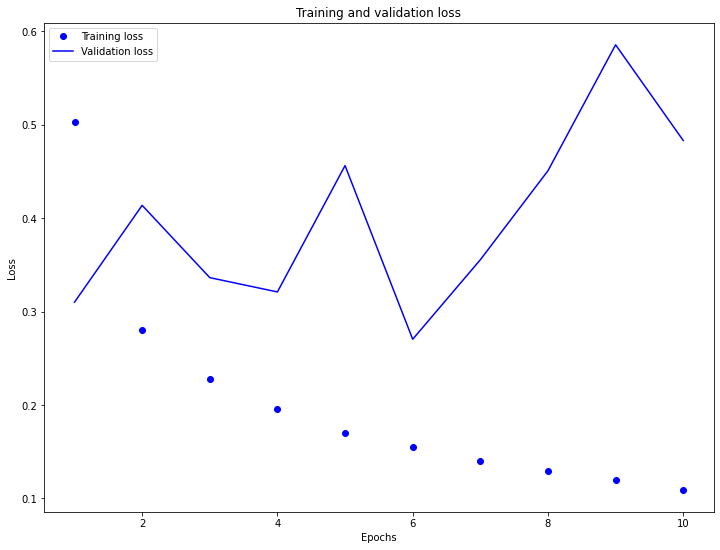

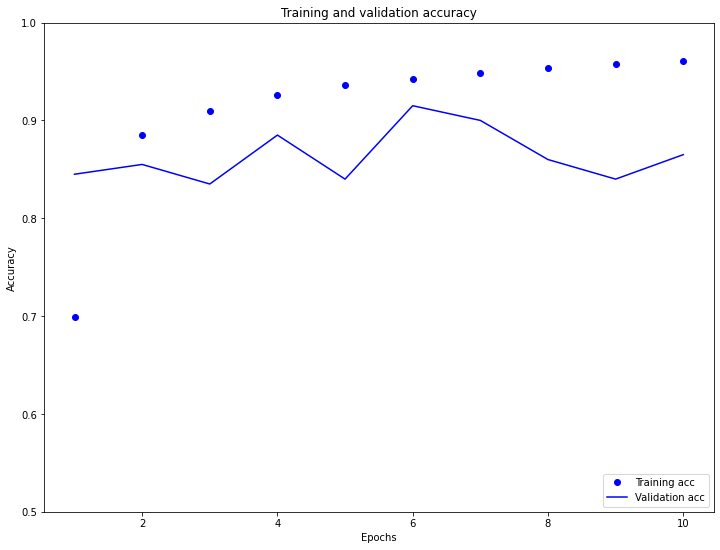

In [29]:
import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

In [30]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(8185, 16)


In [0]:
import io

encoder = info.features['text'].encoder

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for num, word in enumerate(encoder.subwords):
  vec = weights[num+1] # skip 0, it's padding.
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
out_v.close()
out_m.close()

In [0]:
try:
  from google.colab import files
except ImportError:
   pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')